In [1]:
# Importing libraries

from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('../Data-processed/crop_recommendation.csv')

In [3]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,60,37,20.879744,82.002744,6.502985,202.935536,rice
1,100,51,35,21.770462,80.319644,7.038096,226.655537,rice
2,99,60,41,23.004459,82.320763,7.840207,263.964248,rice
3,95,55,44,26.491096,80.158363,6.980401,242.864034,rice
4,84,57,44,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,94,26,25,26.774637,66.413269,6.780064,177.774507,coffee
2196,97,40,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,117,35,31,24.131797,67.225123,6.362608,173.322839,coffee
2198,85,27,28,26.272418,52.127394,6.758793,127.175293,coffee
2199,109,17,28,23.603016,60.396475,6.779833,140.937041,coffee


In [5]:
df.size

17600

In [6]:
df.shape

(2200, 8)

In [7]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [8]:
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [20]:
df['label'].value_counts()

jute           100
blackgram      100
pigeonpeas     100
mothbeans      100
cotton         100
lentil         100
banana         100
muskmelon      100
mango          100
orange         100
watermelon     100
papaya         100
mungbean       100
rice           100
maize          100
kidneybeans    100
coconut        100
chickpea       100
apple          100
pomegranate    100
coffee         100
grapes         100
Name: label, dtype: int64

<AxesSubplot:>

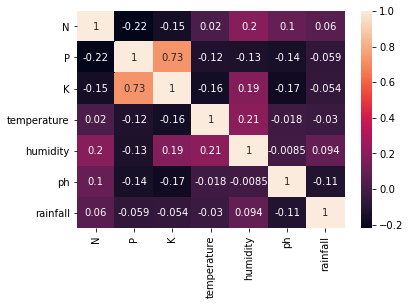

In [21]:
sns.heatmap(df.corr(),annot=True)

In [9]:
features = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = df['label']
labels = df['label']

In [10]:
# Initialzing empty lists to append all model's name and corresponding name
acc = []
model = []

In [11]:
# Splitting into train and test data

from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

# Logistic Regression

In [12]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)

LogReg.fit(Xtrain,Ytrain)

predicted_values = LogReg.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Logistic Regression's Accuracy is:  0.9522727272727273
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.93      0.88      0.90        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       0.82      0.90      0.86        20
      grapes       1.00      1.00      1.00        18
        jute       0.91      0.75      0.82        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       0.96      1.00      0.98        23
       maize       0.89      0.81      0.85        21
       mango       1.00      1.00      1.00        26
   mothbeans       0.89      0.89      0.89        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00   

In [13]:
# Cross validation score (Logistic Regression)
from sklearn.model_selection import cross_val_score
score = cross_val_score(LogReg,features,target,cv=5)
score

array([0.95909091, 0.93863636, 0.97045455, 0.95909091, 0.95      ])

# Random Forest 

In [14]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

RF's Accuracy is:  0.990909090909091
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.94      1.00      0.97        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.93      0.96      0.95        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.95      0.97        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00 

In [15]:
# Cross validation score (Logistic Regression)
score = cross_val_score(RF,features,target,cv=5)
score

array([0.99772727, 0.99772727, 0.99318182, 0.99772727, 0.99090909])

<AxesSubplot:title={'center':'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

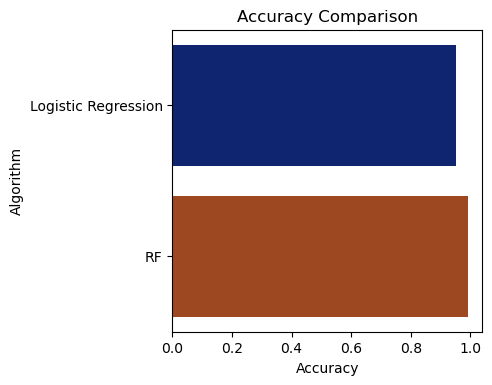

In [22]:
plt.figure(figsize=[4,4],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')

In [17]:
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v)

Logistic Regression --> 0.9522727272727273
RF --> 0.990909090909091


## Making a prediction

In [18]:
data = np.array([[104,18, 30, 23.603016, 60.3, 6.7, 140.91]])
prediction = LogReg.predict(data)
print(prediction)
#coffee

['coffee']


In [19]:
data = np.array([[83, 45, 60, 28, 70.3, 7.0, 150.9]])
prediction = RF.predict(data)
print(prediction)
#jute

['jute']
